In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Summary of Weather.csv')
df = df[:10000]

C:\Users\kp779\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dropna(axis=1, inplace =True)
df.dropna()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,42,7,1,78.0,72.0,75.0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,42,7,2,84.0,71.0,78.0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,42,7,3,79.0,72.0,76.0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,42,7,4,80.0,72.0,76.0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,42,7,5,80.0,71.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10704,1945-4-2,0,30.555556,22.222222,26.666667,45,4,2,87.0,72.0,80.0
9996,10704,1945-4-3,0,30.000000,22.222222,26.111111,45,4,3,86.0,72.0,79.0
9997,10704,1945-4-4,0,30.555556,22.222222,26.666667,45,4,4,87.0,72.0,80.0
9998,10704,1945-4-5,0,30.000000,21.111111,22.777778,45,4,5,86.0,70.0,73.0


In [5]:
df.isnull().sum()

STA         0
Date        0
Precip      0
MaxTemp     0
MinTemp     0
MeanTemp    0
YR          0
MO          0
DA          0
MAX         0
MIN         0
MEA         0
dtype: int64

<AxesSubplot:>

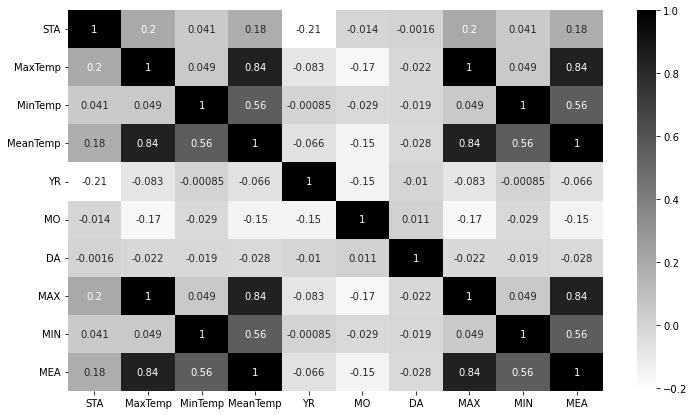

In [6]:
plt.figure(figsize=(12,7))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='binary')

Columns to Drop ['MaxTemp', 'MinTemp', 'MeanTemp']


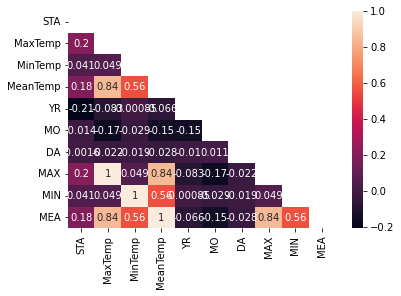

In [7]:
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype('bool'))
sns.heatmap(lower, annot=True)
to_drop = [column for column in lower.columns if any(lower[column] > 0.95)]
print("Columns to Drop",to_drop)

In [8]:
df.drop(columns = to_drop, inplace=True)

In [9]:
df.rename(columns={'MEA':'Temp'}, inplace=True)

In [10]:
df.columns

Index(['STA', 'Date', 'Precip', 'YR', 'MO', 'DA', 'MAX', 'MIN', 'Temp'], dtype='object')

In [11]:
df = df[df['Precip'].str.contains('T') == False]
df['Precip'] = df['Precip'].astype('float')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8654 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STA     8654 non-null   int64  
 1   Date    8654 non-null   object 
 2   Precip  8654 non-null   float64
 3   YR      8654 non-null   int64  
 4   MO      8654 non-null   int64  
 5   DA      8654 non-null   int64  
 6   MAX     8654 non-null   float64
 7   MIN     8654 non-null   float64
 8   Temp    8654 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 676.1+ KB


In [63]:
Y = df['Temp']
X = df.drop(columns=['Temp','Date']).astype('float')

In [64]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.2, random_state=3)

In [65]:
from sklearn.svm import SVR

model = SVR(kernel='rbf', C=10)

In [66]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_train = sc_x.fit_transform(X_train)
X_test = sc_y.fit_transform(X_test)

In [67]:
model.fit(X_train, y_train)

SVR(C=10)

In [68]:
y_pred = model.predict(X_test)

In [69]:
y_pred

array([77.66108005, 80.08521766, 79.09350087, ..., 81.0793791 ,
       78.19822579, 81.75065935])

In [70]:
y_test

4877    78.0
2311    80.0
4499    79.0
4551    77.0
9647    80.0
        ... 
9734    79.0
6614    78.0
4456    81.0
7403    78.0
3776    82.0
Name: Temp, Length: 1731, dtype: float64

In [71]:
model.score(X_test, y_test)

0.9704217887736731

Now compared to the Linear Regression model, We can see that almost 7 % increment is there in the accuracy, without any optimizations and just by changing the algorithm. So, for this dataset We can say that SVR is the better than LinearRegression.